<a href="https://colab.research.google.com/github/AriannaGrossi/MLPNS_AGrossi/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl

In [ ]:
#preso da https://iamtrask.github.io/2015/07/12/basic-python-network/

In [2]:
X=np.array(
    [[0,0,1],
     [1,1,1],
     [1,0,1],
     [0,1,1]])

(-0.5, 2.5, 3.5, -0.5)

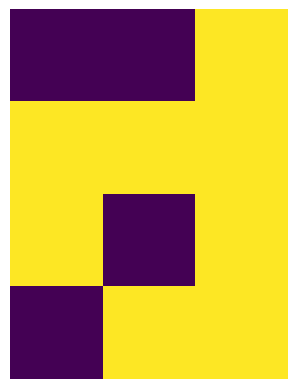

In [3]:
pl.imshow(X)
pl.axis("off")

In [4]:
y=np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [5]:
y.shape

(4, 1)

In [6]:
print("input\n", X)
print("output\n", y)

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


#Basic architecture: 1 layer
4 osservazioni

3 neuroni

1 layer

In [7]:
#activation function
def sigmoid(x):
  return 1./(1.+np.exp(-x))


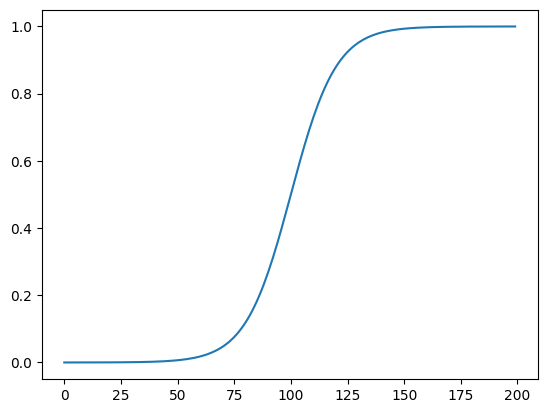

In [8]:
pl.plot(sigmoid(np.arange(-10,10,0.1)))

In [9]:
#loss function
def loss(prediction, target):
  return target-prediction

In [10]:
def dsigmoid(x):
  return x*(1.-x)

#Neural network

In [11]:
training= 6000

In [12]:
#layer of synopses/neurons
#4 x 3 
np.random.seed(302)
syn0= 2*np.random.random((3,1))-1
print(syn0)
print(syn0.shape)

[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]
(3, 1)


In [13]:
#layer of synopses/neurons
#4 x 3 
np.random.seed(302)
syn0= 2*np.random.random((3,1))-1
print(syn0)
print(syn0.shape)

loss_output=[]

for iter in range(training):
  inputLayer= X

  #forward propagation
  #linear regression
  l1=np.dot(inputLayer, syn0)

  #activation
  output= sigmoid(l1)
  #calculate error
  output_error=loss(output, y)
  loss_output.append(np.abs(output_error).sum())
  #calculate correction
  output_delta=output_error*dsigmoid(output)
  #apply correction to weights
  syn0 += np.dot(inputLayer.T, output_delta)

print("output after training", output)
print("output target\n", y)

[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]
(3, 1)
output after training [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'global loss')

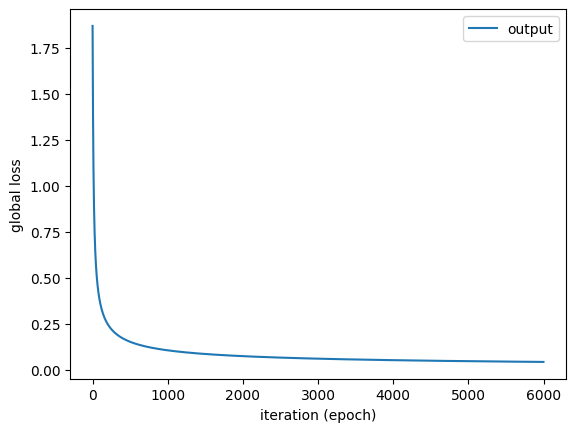

In [14]:
pl.plot(loss_output, label="output")
pl.legend()
pl.xlabel("iteration (epoch)")
pl.ylabel("global loss")

#Due hidden layers

In [15]:
syn0 = 2* np.random.random((3,5)) -1 

syn1 = 2* np.random.random((5,1)) -1



loss_output = []
loss_hidden = []

for iter in range(training):
  input_layer = X 
  l1 = np.dot(input_layer,syn0)
  hidden =sigmoid(l1)
  
  hidden_error=loss(hidden,y)
  loss_hidden.append(np.abs(hidden_error).sum())

  l2=np.dot(hidden,syn1)

  
  output = sigmoid(l2)
  output_error = loss(output,y)
  loss_output.append(np.abs(output_error).sum())



  #calcolo la correzione
  output_delta = output_error * dsigmoid(output) 
  hidden_delta = hidden_error * dsigmoid(hidden)
  #applico la correzione
  syn0 += np.dot(input_layer.T, hidden_delta) 
  syn1 += np.dot(hidden.T, output_delta)

print("output after cleanning: ", output)
print("target: ", y)

output after cleanning:  [[0.510144  ]
 [0.9608267 ]
 [0.96106004]
 [0.50824105]]
target:  [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'Global Loss')

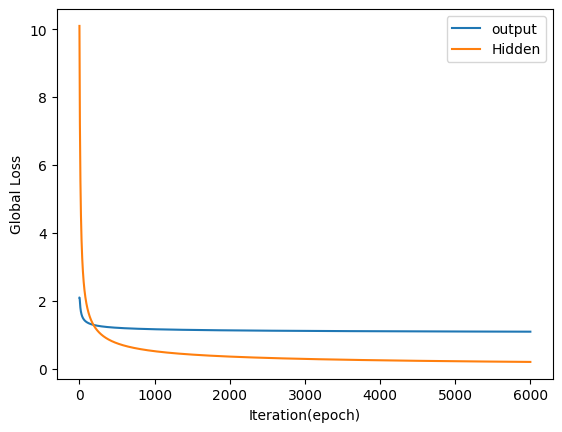

In [16]:
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="Hidden")
pl.plot()
pl.legend()
pl.xlabel("Iteration(epoch)")
pl.ylabel("Global Loss")